In [2]:
def barajar(tipoBaraja):
    """
    retorna una lista con la baraja elegida ordenada, barajar es equivalente a sacar una carta de
    posicion aleatoria en una lista ordenada
    """

    poker = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]
    barajaEspanola = [1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,10,11,12]
    poker_m = [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]
    barajaEspanola_m = [1,2,3,4,5,6,7,10,10,10,1,2,3,4,5,6,7,10,10,10,1,2,3,4,5,6,7,10,10,10,1,2,3,4,5,6,7,10,10,10]
    
    if tipoBaraja == "barajaEspanola":
        return barajaEspanola
    elif tipoBaraja == "barajaEspanola_m":
        return barajaEspanola_m
    elif tipoBaraja == "poker_m":
        return poker_m
    else:
        return poker

In [3]:
from random import randrange

def partida(mazo):
    """
    retorna 0 si la suma pasa de 21, si da 21 retorna el numero de cartas sacadas
    """
    puntos = 0
    cartasSacadas = 0
    
    while puntos < 21 :
        carta = randrange(len(mazo))
        puntos += mazo[carta]
        cartasSacadas +=1
        mazo.pop(carta)
    
    if puntos == 21:
        return cartasSacadas
    else:
        return 0

In [4]:
def esperimento(n, tipoBaraja):
    """
    realiza n partidas  y retorna una lista con las veces que salieron 21 
    para cada numero de cartas correspondiente representadas por la posicion de la lista
    """
    # la lista tiene 11 posiciones porque no se puede lograr 21 con mas de 11
    acumulado = [0,0,0,0,0,0,0,0,0,0]

    for i in range(n):
        baraja = barajar(tipoBaraja)
        resultado = partida(baraja)

        if resultado != 0 :
            acumulado[resultado] += 1
            
    return acumulado

Probabilidad de 21:  0.14540000000000003


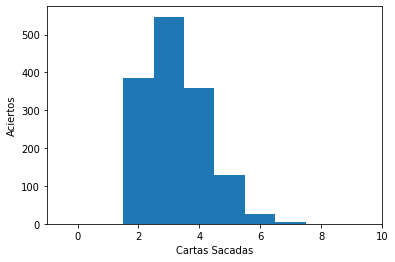

In [5]:
# Experimento 1.1
import matplotlib.pyplot as plt

numeroRepeticiones = 10000
resultado  = esperimento(numeroRepeticiones, "poker")

plt.bar(range(len(resultado)), resultado, width = 1 )
plt.xlabel("Cartas Sacadas")
plt.ylabel("Aciertos")

suma = 0
for i in range(len(resultado)):
    resultado[i] /= numeroRepeticiones
    suma += resultado[i]
print("Probabilidad de 21: ",suma)

Probabilidad de 21:  0.1631


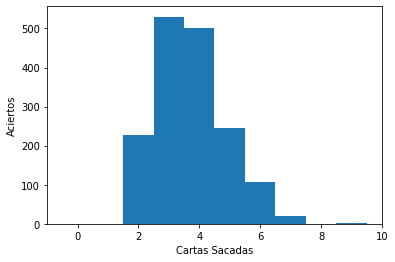

In [6]:
# Experimento 1.2
import matplotlib.pyplot as plt

numeroRepeticiones = 10000
resultado  = esperimento(numeroRepeticiones, "barajaEspanola")

plt.bar(range(len(resultado)), resultado, width = 1 )
plt.xlabel("Cartas Sacadas")
plt.ylabel("Aciertos")

suma = 0
for i in range(len(resultado)):
    resultado[i] /= numeroRepeticiones
    suma += resultado[i]
print("Probabilidad de 21: ",suma)

Probabilidad de 21:  0.13709999999999997


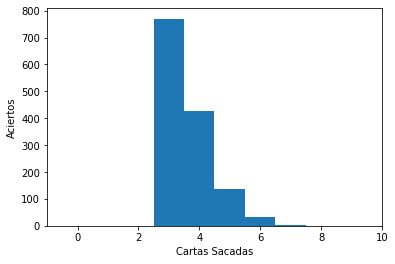

In [7]:
# Experimento 2.1
import matplotlib.pyplot as plt

numeroRepeticiones = 10000
resultado  = esperimento(numeroRepeticiones, "poker_m")

plt.bar(range(len(resultado)), resultado, width = 1 )
plt.xlabel("Cartas Sacadas")
plt.ylabel("Aciertos")

suma = 0
for i in range(len(resultado)):
    resultado[i] /= numeroRepeticiones
    suma += resultado[i]
print("Probabilidad de 21: ",suma)

Probabilidad de 21:  0.16190000000000002


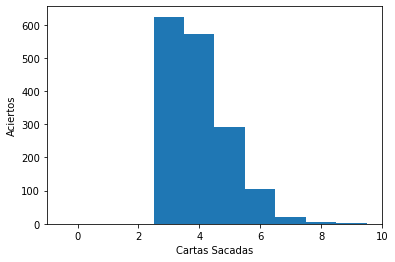

In [8]:
# Experimento 2.2
import matplotlib.pyplot as plt

numeroRepeticiones = 10000
resultado  = esperimento(numeroRepeticiones, "barajaEspanola_m")

plt.bar(range(len(resultado)), resultado, width = 1 )
plt.xlabel("Cartas Sacadas")
plt.ylabel("Aciertos")

suma = 0
for i in range(len(resultado)):
    resultado[i] /= numeroRepeticiones
    suma += resultado[i]
print("Probabilidad de 21: ",suma)

In [57]:
def experimento_3(deck,rango):
  resultado=0
  histograma=[]
  for i in range(rango):
    mazo=barajar(deck)
    mazo.remove(7)
    mazo.remove(7)
    mazo.remove(5)
    random.shuffle(mazo)
    a=int(len(mazo)/2)
    mitad_mazo=mazo[:a]
    puntos=19
    cartasSacadas = 0
    while puntos<=21:
      carta_que_sale = mitad_mazo[0]
      puntos=puntos + carta_que_sale
      mitad_mazo.pop(0)
      cartasSacadas += 1
      if puntos >=21:
        break
    if puntos == 21:
      resultado=resultado+1
      histograma.append(cartasSacadas)
       
  probabilidad=resultado/rango
  return (histograma,probabilidad)

    

probabilidad =  0.0842


(array([800.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  42.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

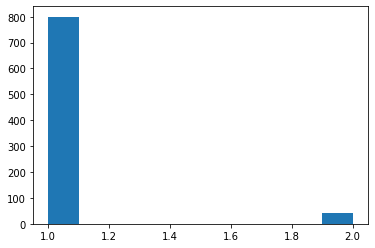

In [60]:
(histograma, probabilidad)=experimento_3('poker_m',10000)
print('probabilidad = ',probabilidad)
plt.hist(histograma)

probabilidad =  0.1194


(array([1121.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          73.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

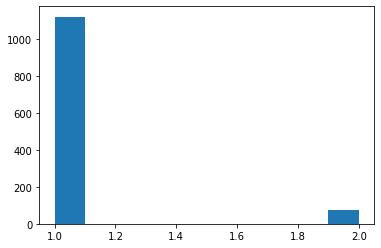

In [59]:
(histograma, probabilidad)=experimento_3('barajaEspanola',10000)
print('probabilidad = ',probabilidad)
plt.hist(histograma)

In [9]:
# Experimento 4
# La probabilidad calculada analiticamente para el hot_deck es  8/15 o 0.533333 y para el cold_deck es 0
import matplotlib.pyplot as plt
import random

def inicializar (mazo):
  hot_deck=[1,1,1,1,2,2,2,2,3,3]
  cold_deck=[4,10,6,10,4,10,6,10,4,3]
  cold_poker = [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]
  cold_barajaEspanola = [1,2,3,4,5,6,7,10,10,10,1,2,3,4,5,6,7,10,10,10,1,2,3,4,5,6,7,10,10,10,1,2,3,4,5,6,7,10,10,10]
  if mazo=='hot_deck':
    return hot_deck
  elif mazo == "cold_deck":
     return cold_deck
  elif mazo == "cold_poker ":
    return cold_poker 
  else:
        return cold_barajaEspanola

In [10]:
def experimento(deck,rango):
  resultado=0
  histograma=[]
  for i in range(rango):
    if deck=='hot_deck' or deck=='cold_deck':
      puntos=19
    else: puntos=0
    cartasSacadas = 0
    mazo=inicializar(deck)
    while puntos<=21:
      random.shuffle(mazo)
      carta_que_sale = mazo[0]
      puntos=puntos + carta_que_sale
      mazo.pop(0)
      cartasSacadas += 1
      if puntos >=21:
        break
    if puntos == 21:
      resultado=resultado+1
      histograma.append(cartasSacadas)
      
  
  probabilidad=resultado/rango
  return (histograma, resultado,probabilidad)
 

probabilidad =  0.5347


(array([4006.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1341.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

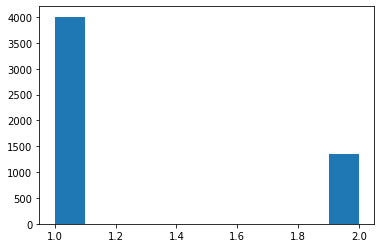

In [11]:
#Experimento 4.1
(histograma, resultado,probabilidad)=experimento('hot_deck',10000)
print('probabilidad = ',probabilidad)
plt.hist(histograma)

In [12]:
# Experimento 4.2
(histograma, resultado,probabilidad)=experimento('cold_deck',10000)
print('probabilidad = ',probabilidad)

probabilidad =  0.0


ganancia_total= 423.2559999999976


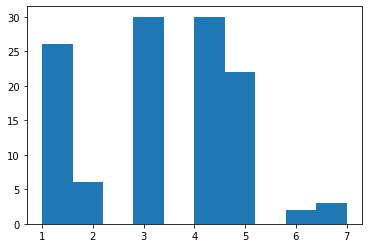

In [32]:
# Experimento 5 con poker
gano_acumulado=0
perdio_acumulado=0
rango=10000
for i in range(rango):
  (histograma_1,resultado,probabilidad)=experimento('hot_deck',60)
  gano_hot=resultado*1000
  perdio_hot=(60-resultado)*1000
  (histograma_2,resultado,probabilidad)=experimento('cold_poker',540)
  gano_cold=resultado*10
  perdio_cold=(540-resultado)*10
  gano=gano_hot+gano_cold
  perdio=perdio_hot+perdio_cold
  gano_acumulado=gano_acumulado+gano
  perdio_acumulado=perdio_acumulado+perdio
  
histograma_3=histograma_1+histograma_2
plt.hist(histograma_3)
  
gano_promedio = gano_acumulado/rango
perdio_promedio = perdio_acumulado/rango
print('ganancia_total=',gano_promedio-perdio_promedio)


ganancia_total= 343.5


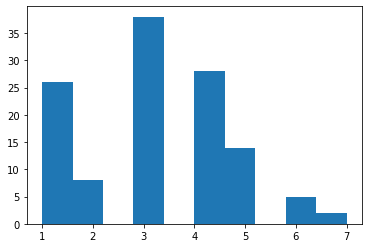

In [62]:
# Experimento 5 con Baraja esppañola
gano_acumulado=0
perdio_acumulado=0
rango=10000
for i in range(rango):
  (histograma_1,resultado,probabilidad)=experimento('hot_deck',60)
  gano_hot=resultado*1000
  perdio_hot=(60-resultado)*1000
  (histograma_2,resultado,probabilidad)=experimento('cold_barajaEspanola',540)
  gano_cold=resultado*10
  perdio_cold=(540-resultado)*10
  gano=gano_hot+gano_cold
  perdio=perdio_hot+perdio_cold
  gano_acumulado=gano_acumulado+gano
  perdio_acumulado=perdio_acumulado+perdio
  
histograma_3=histograma_1+histograma_2
plt.hist(histograma_3)
  
gano_promedio = gano_acumulado/rango
perdio_promedio = perdio_acumulado/rango
print('ganancia_total=',gano_promedio-perdio_promedio)